## In this assignment students will build the random forest model after normalizing the variable to house pricing from boston data set.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

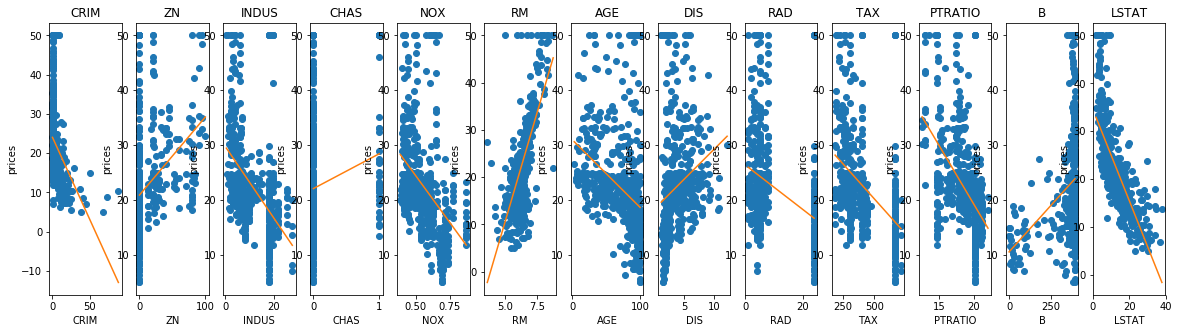

In [28]:
plt.figure(figsize=(20,5))
for i,col in enumerate(features.columns):
    plt.subplot(1,13,i+1)
    x=features[col]
    y=targets
    plt.plot(x,y,'o')
    plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

In [32]:
X_train,X_test,y_train,y_test=train_test_split(features,targets,train_size=0.8,test_size=0.2,random_state=42)
scaler=StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)

In [33]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [36]:
rf.oob_score_

0.8405993801646644

Text(0.5,0,'observed')

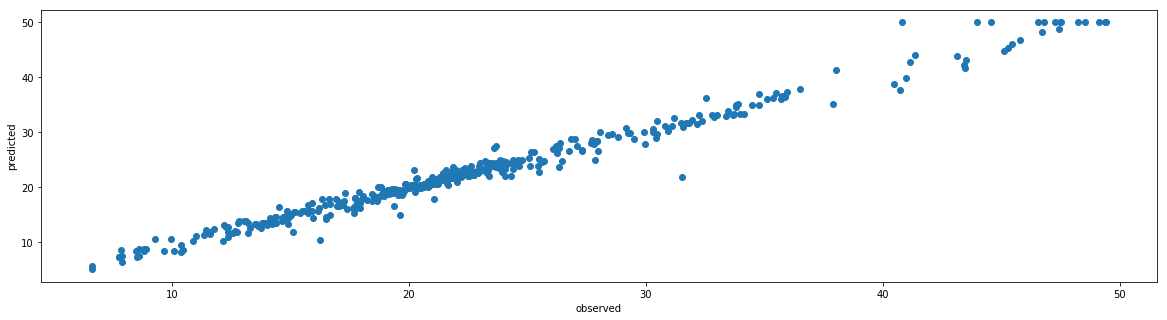

In [47]:
pred=rf.predict(X_train)
plt.figure(figsize=(20,5))
plt.plot(pred,y_train,'o')
plt.ylabel('predicted')
plt.xlabel('observed')

In [48]:
rf.score(X_test,y_test) #Score of Random Forest model

0.8848177716833759